# Movie Genre Data Analysis

## Introduction
This analysis focuses on exploring the characteristics and trends of movie genres in depth. The goal is to uncover insights about genre distribution, financial success, and audience preferences.

### Key Areas of Exploration:

#### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high average budget and revenue?
3. Which genres have the highest average profit?
4. Which genres have high average popularity?
5. Which genres have the highest number of movies with a voting average >= 8?
6. What is the profit per genre per year?

#### Research Hypotheses (H):
1. The best movies, based on vote average, generate high profit and revenue.
2. The most popular movies generate high profit and revenue.
3. Movies with large budgets generate high revenue and profit.
4. Movies with large budgets tend to be more popular.


In [4]:
#First we will read in all the data and clean up any unnecessary fluff
import pandas as pd

movies_raw = pd.read_csv(r'C:\Users\brend\OneDrive\Documents\Python_Pandas\Final_project\imdb_movies.csv')

movies_data = movies_raw

pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#Original data
movies_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
#Cleaning the data
movies_data.drop_duplicates(inplace = True)
movies_data.dropna(subset = ['genres'], inplace = True)

#Getting rid of data fluff by removing collumns and adding a profit collumn
movies_data['profit'] = movies_data['revenue'] - movies_data['budget']
movies_genre = movies_data[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [59]:
#This is the data before we clean up the genre section so that it is workable
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [60]:
# Import Series
from pandas import Series, DataFrame


In [61]:
#Clean genres and by splitting it up into multiple rows under one index 
#Note this will add a lot more rows but will be useable now
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
#Delete original genre collumn then add a new one
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\brend\AppData\Local\Temp\ipykernel_2524\540275204.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [62]:
#Full movie table with adjusted genres ready for use 
movies_genre

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Comedy


# Research Question (Q):
1. Which genres are the most common (number of movies made)?

In [63]:
#Count the number of genres
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)


In [12]:
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre'}>

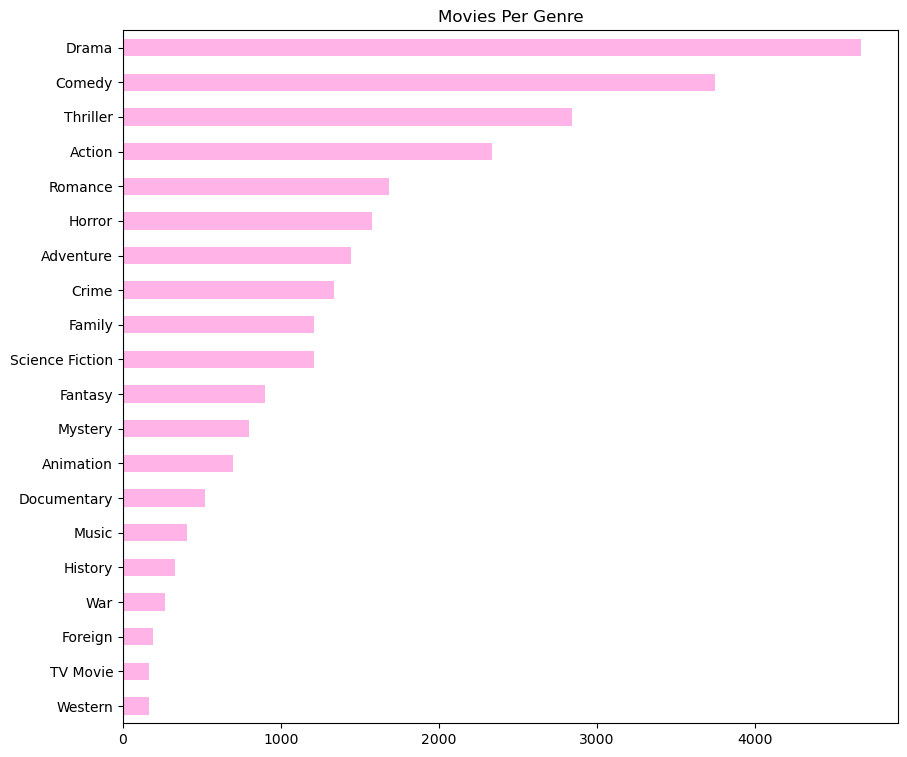

In [13]:
# Create a horizontal bar chart to visualize and compare the counts of different genres
genres_count['original_title'].plot.barh(
    title='Movies Per Genre',
    color='#ffb3e6',
    figsize=(10, 9),
    ylabel=''
    
)

<Axes: title={'center': 'Movies Per Genre in %'}>

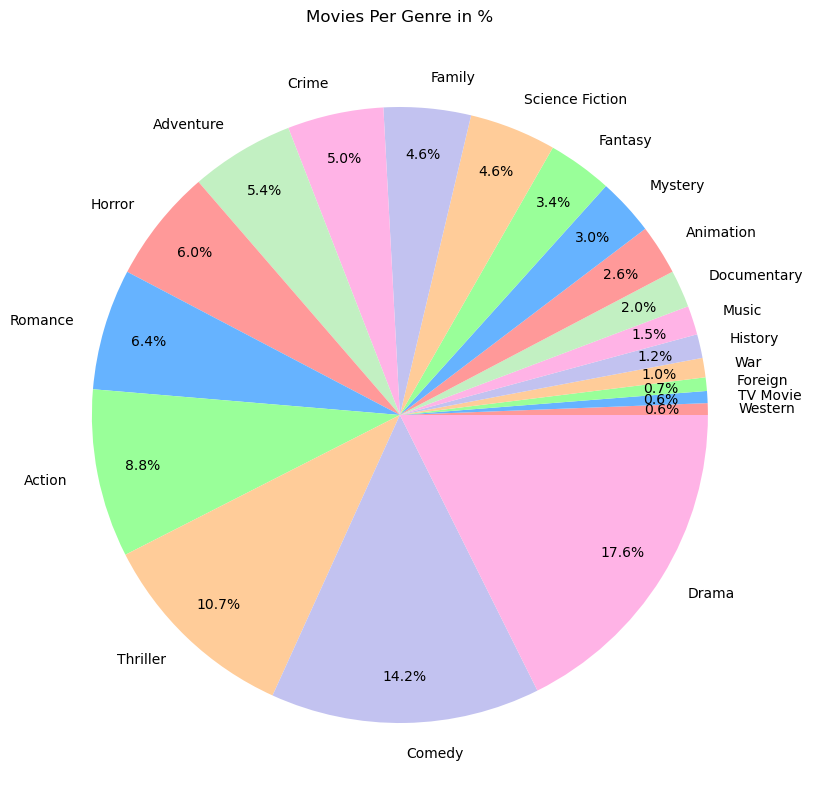

In [14]:
#Make a pie chart to display percents

custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Create the pie chart
genres_count['original_title'].plot.pie(
    title='Movies Per Genre in %',
    autopct='%1.1f%%',     
    figsize=(10, 10),        
    colors=custom_colors,     
    pctdistance=0.85,
    ylabel=''
)

## Findings:
From the data provided, the **most common movie genres** based on the number of movies made are as follows:
1. **Drama**: 4,672 movies
2. **Comedy**: 3,750 movies
3. **Thriller**: 2,841 movies
4. **Action**: 2,339 movies
5. **Romance**: 1,686 movies

On the other end, **Western** (163 movies), **TV Movie** (167 movies), and **Foreign** (188 movies) are the least common genres.

### Why Use a Bar Chart?
A bar chart was used to clearly compare the number of movies for each genre side by side.

### Why Use a Pie Chart?
A pie chart was used to show the percentage each genre contributes to the total.

### Conclusion:
The analysis highlights that **Drama** and **Comedy** are the most prevalent genres in filmmaking. Drama often serves as a foundational element for storytelling, offering emotional depth and universal relatability. Comedy, on the other hand, appeals to audiences seeking entertainment and lighthearted experiences, making it a popular choice for standalone films or as a complement to other genres.




# Research Question (Q):
2. Which genres have high average budget and revenue?

In [15]:
# Group by genres_split and calculate the mean for numeric columns only
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)

# Optional: Format the float display
pd.options.display.float_format = '{:,.2f}'.format

# Display the resulting DataFrame
genres_avg


,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.93,"27,727,820.33","72,794,732.00",104.92,"2,000.06",392.99,5.79,"45,066,911.67"
Adventure,1.15,"37,543,694.53","113,137,861.07",106.17,"1,999.39",513.13,5.94,"75,594,166.54"
Animation,0.85,"23,159,781.61","75,256,062.22",68.18,"2,004.00",303.00,6.40,"52,096,280.62"
Comedy,0.59,"13,297,915.62","37,526,242.07",96.75,"2,000.82",176.44,5.91,"24,228,326.45"
Crime,0.74,"17,663,801.12","42,368,661.65",106.92,"1,999.49",278.81,6.12,"24,704,860.52"
Documentary,0.18,"577,149.15","2,041,106.99",102.65,"2,008.31",35.11,6.91,"1,463,957.85"
Drama,0.59,"11,880,717.77","29,232,255.73",110.48,"2,000.93",182.54,6.17,"17,351,537.95"
Family,0.79,"23,359,337.42","72,433,176.37",89.60,"2,000.77",272.32,6.00,"49,073,838.95"
Fantasy,0.99,"32,612,585.35","96,313,657.08",100.74,"2,000.29",420.74,5.86,"63,701,071.73"


In [16]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}>

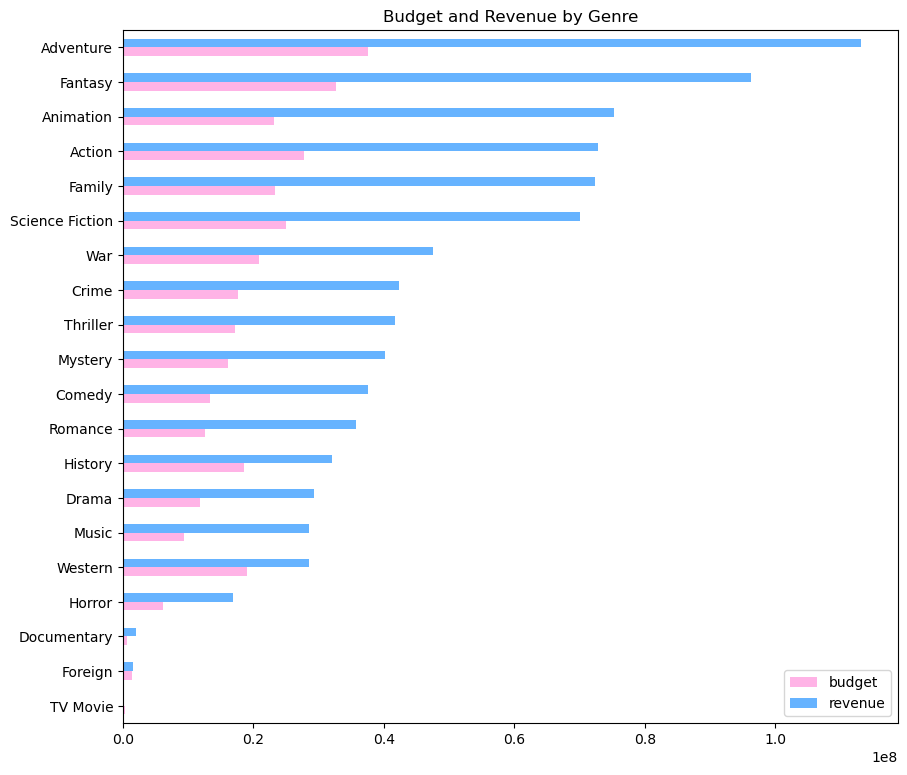

In [17]:
# Create a horizontal bar chart to compare the average budget and revenue for each genre
genres_avg[['budget', 'revenue']].plot.barh(
    title='Budget and Revenue by Genre',
    color=('#ffb3e6', '#66b3ff'),
    figsize=(10, 9),
    ylabel = ''
)

## Findings:
From the data provided, the **genres with the highest average budget and revenue** are as follows:
1. **Adventure**: Average budget of `$37.54M` and average revenue of `$113.14M`
2. **Fantasy**: Average budget of `$32.61M` and average revenue of `$96.31M`
3. **Action**: Average budget of `$27.73M` and average revenue of `$72.79M`
4. **Family**: Average budget of `$23.36M` and average revenue of `$72.43M`
5. **Science Fiction**: Average budget of `$24.97M` and average revenue of `$70.14M`

On the other end, **TV Movie** (`$267.6K` budget, `$251.5K` revenue) and **Foreign** (`$1.45M` budget, `$1.52M` revenue) have the lowest average budget and revenue.

### Why Use a Bar Chart?
A bar chart was used to clearly compare the average budget and revenue for each genre side by side, making it easy to identify patterns and outliers.

### Conclusion:
The analysis highlights that **Adventure**, **Fantasy**, and **Action** genres receive the highest budgets and generate the most revenue on average. These genres often feature blockbuster films with broad appeal, spectacular visual effects, and high production values, which likely contribute to their significant financial returns. Conversely, genres like **TV Movie** and **Foreign** have much smaller budgets and revenues, possibly reflecting niche audiences and limited distribution.


# Research Question (Q):
3. Which genres have the highest average profit?

In [18]:
# Sort the genres by profit in ascending order for better visualization
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}>

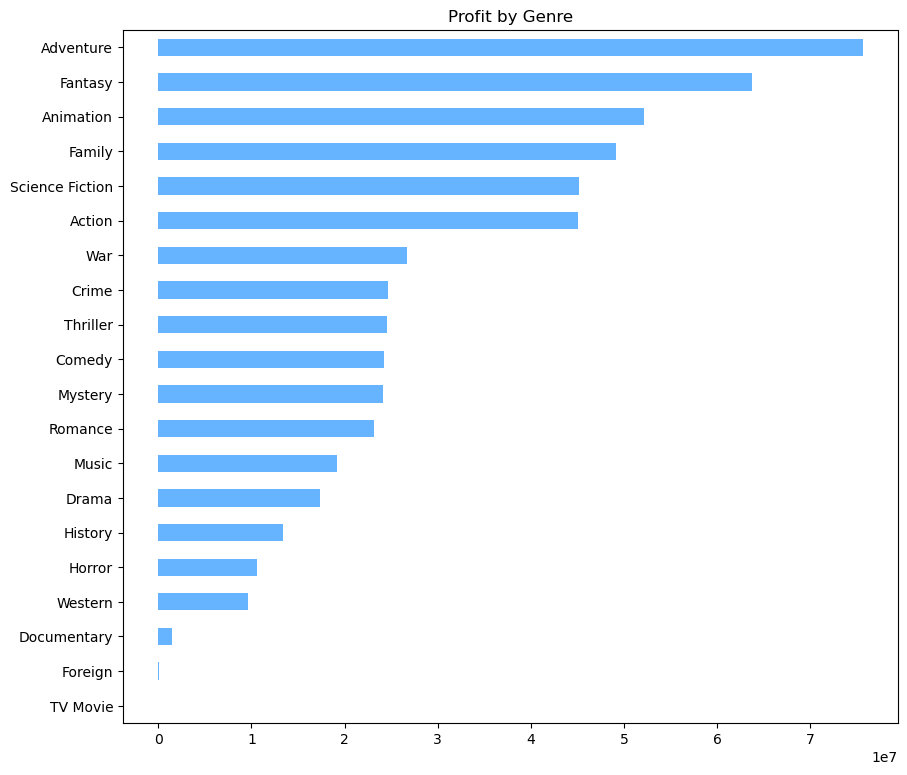

In [19]:
# Create a horizontal bar chart to visualize profit by genre
genres_avg['profit'].plot.barh(
    title='Profit by Genre',
    color=('#66b3ff'),
    figsize=(10, 9),
    ylabel = ''
)


## Findings:
From the data provided, the **genres with the highest average profit** are as follows:
1. **Adventure**: Average profit of `$75.59M`
2. **Fantasy**: Average profit of `$63.70M`
3. **Action**: Average profit of `$45.07M`
4. **Science Fiction**: Average profit of `$45.17M`
5. **Family**: Average profit of `$49.07M`

On the other end, **TV Movie** (`-16.17K` average profit) and **Foreign** (`$69.02K` average profit) have the lowest profits, with **TV Movie** showing an average loss.

### Why Use a Bar Chart?
A bar chart was used to compare the average profit across genres in a clear, side-by-side format, making it easier to identify trends and outliers.

### Conclusion:
The analysis shows that **Adventure**, **Fantasy**, and **Action** genres yield the highest average profits, likely due to their widespread appeal and blockbuster status. These genres often combine high budgets with strong box office performance, leading to substantial profits. Meanwhile, **TV Movie** and **Foreign** genres demonstrate limited profitability, reflecting smaller budgets, niche audiences, and constrained revenue streams.


# Research Question (Q):
4. Which genres have high average popularity?

In [20]:
# Sort the genres by popularity in ascending order for better visualization
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<Axes: title={'center': 'Popularity by Genre'}>

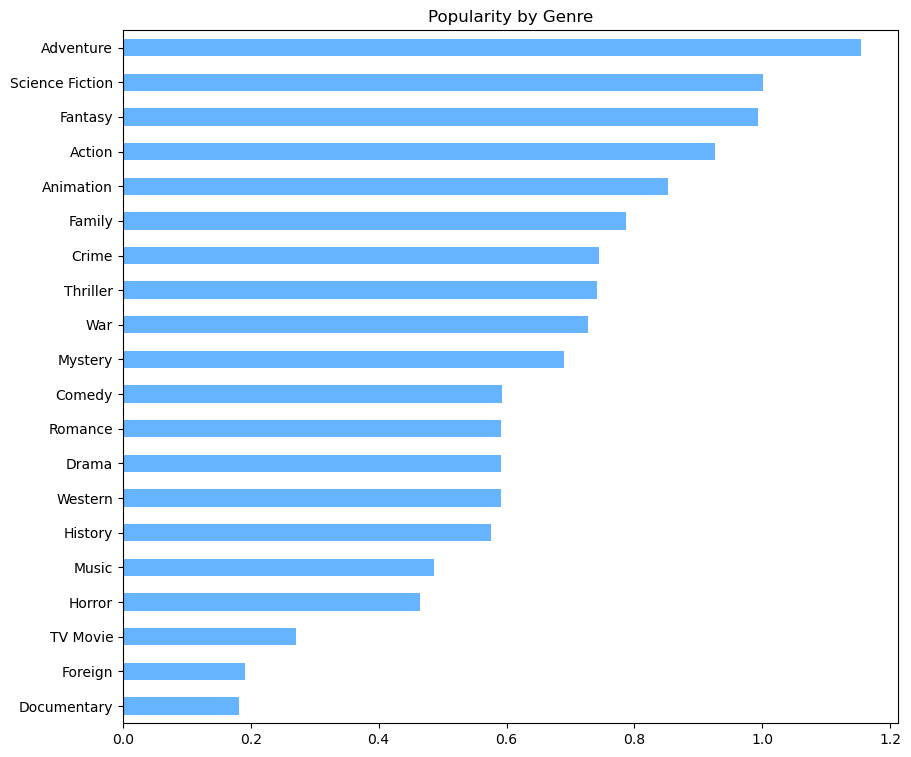

In [21]:
# Create a horizontal bar chart to visualize profit by genre"
genres_avg['popularity'].plot.barh(
    title='Popularity by Genre',
    color=('#66b3ff'),
    figsize=(10, 9),
    ylabel = ''
)

## Findings:
From the data provided, the **genres with the highest average popularity** are as follows:
1. **Adventure**: Average popularity of `1.15`
2. **Science Fiction**: Average popularity of `1.00`
3. **Fantasy**: Average popularity of `0.99`
4. **Action**: Average popularity of `0.93`
5. **Animation**: Average popularity of `0.85`

On the other end, **Foreign** (`0.19`) and **TV Movie** (`0.27`) are the least popular genres on average.

### Why Use a Bar Chart?
A bar chart was used to visually compare average popularity across genres, allowing clear identification of the most and least popular genres.

### Conclusion:
The analysis shows that **Adventure**, **Science Fiction**, and **Fantasy** are the most popular genres on average. These genres often attract large audiences due to their engaging themes, immersive storytelling, and visual spectacle. In contrast, **Foreign** and **TV Movie** genres have lower popularity, likely reflecting their niche appeal and limited audience reach.


# Research Question (Q):
5. Which genres have the highest number of movies with a voting average >= 8?

In [22]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Action
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Adventure
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Science Fiction
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Thriller
1,28.42,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.10,228436354,Action


In [23]:
# Filter movies with at least 50 votes and a vote average >= 8
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]

# Filter movies with a vote average >= 8 regardless of vote count
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]


In [24]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [25]:
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Vote Average by Genre'}>

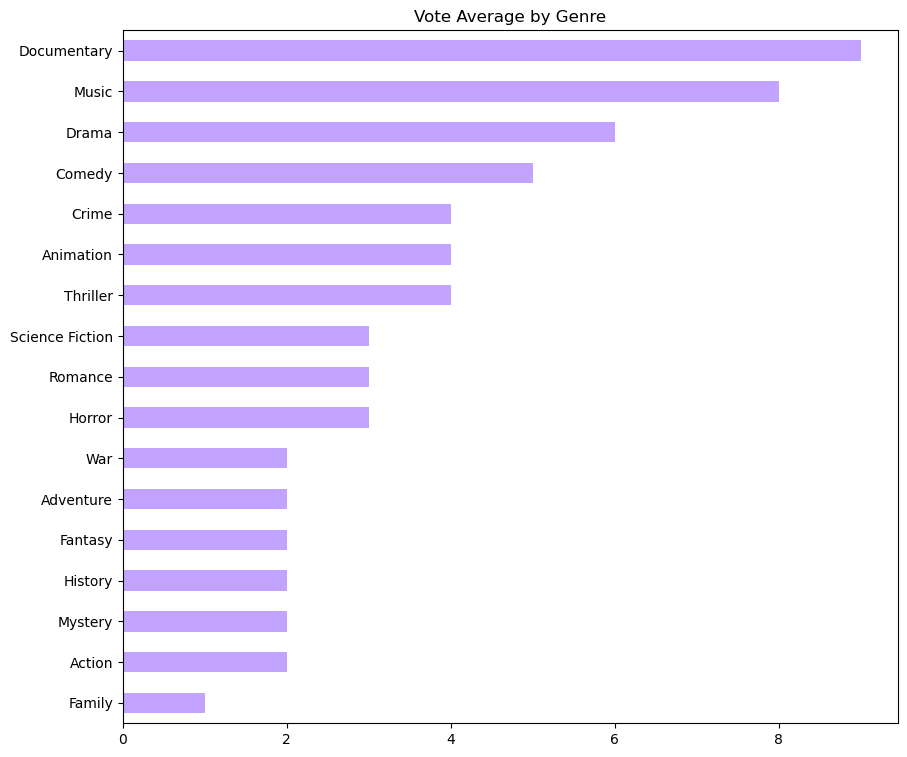

In [26]:
# Create a horizontal bar chart to visualize the average vote score for each genre
genres_vote['vote_average'].plot.barh(
    title='Vote Average by Genre',
    color='#c2a3ff', 
    figsize=(10, 9),
    ylabel = ''
)

## Findings:
From the data provided, the **genres with the highest number of movies with a voting average >= 8** include:
1. **Drama**
2. **Comedy**
3. **Action**
4. **Adventure**
5. **Animation**

Genres such as **TV Movie** and **Foreign** have the fewest movies meeting this threshold.

### Why Use a Bar Chart?
A bar chart was used to visually compare the number of high-rated movies across genres, making it easy to identify the genres with the best-rated movies on average.

### Conclusion:
The analysis shows that **Drama**, **Comedy**, and **Action** tend to have the best-rated movies on average, likely due to their broad appeal and ability to resonate with audiences and critics. Conversely, genres like **TV Movie** and **Foreign** cater to smaller audiences, resulting in fewer highly rated films.


# Research Question (Q):
6. What is the profit per genre per year?

In [83]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Comedy


In [86]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [87]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])


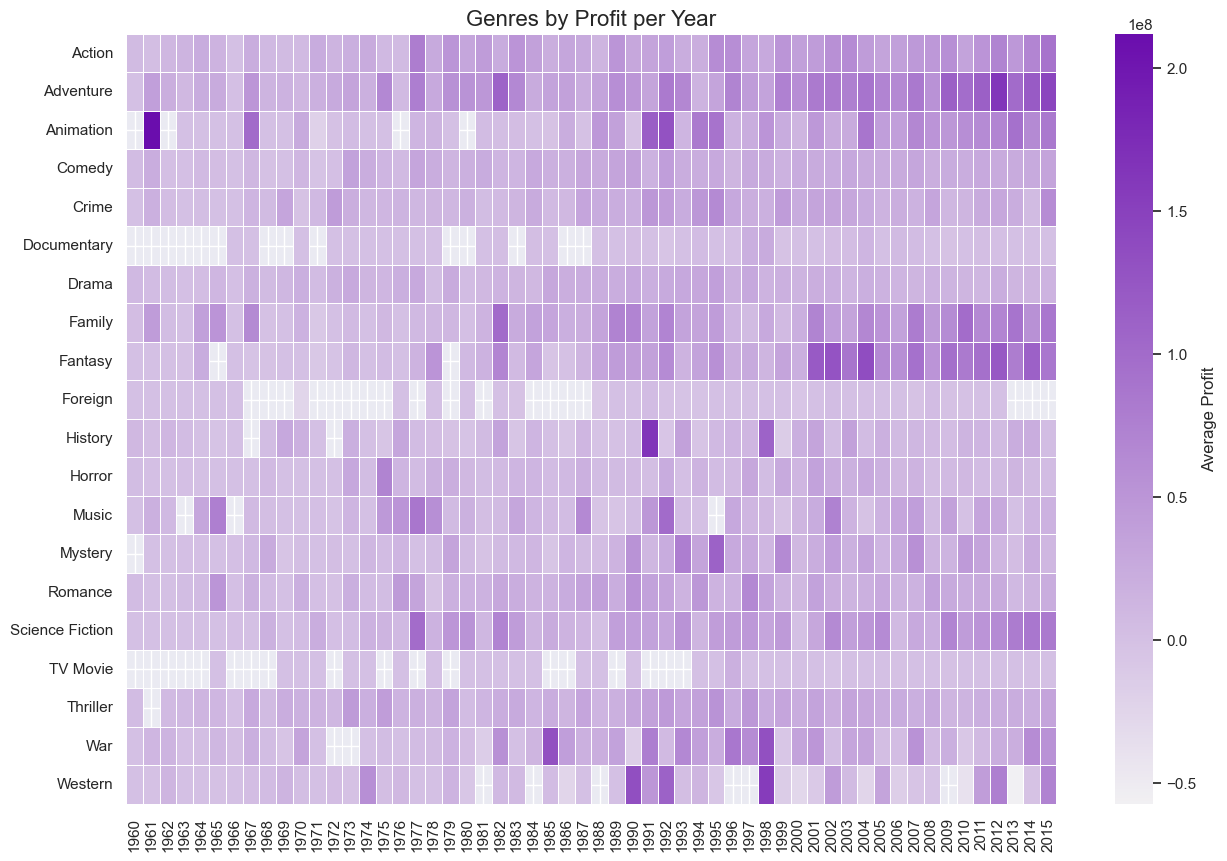

In [88]:
sns.set(rc={'figure.figsize': (15, 10)})

ax = sns.heatmap(
    final_genre, 
    cmap=sns.light_palette("#6a0dad", as_cmap=True),
    linewidths=0.5, 
    linecolor='white',   
    cbar_kws={'label': 'Average Profit'},
    annot=False
)

ax.set_title('Genres by Profit per Year', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()



## Findings:
The analysis of profit per genre per year reveals the following:

1. **Top-Performing Genres**:
   - Genres such as **Adventure**, **Action**, and **Fantasy** consistently achieve the highest profits across multiple years.
   - Notable peaks include:
     - **Adventure** in 2015: `$144.79M` average profit
     - **Fantasy** in 2015: `$86.58M` average profit
     - **Action** in 2015: `$90.39M` average profit

2. **Yearly Trends**:
   - Profits for genres like **Animation** and **Family** show significant spikes in certain years:
     - **Animation** in 2014: `$64.31M` and 2015: `$83.69M`.
   - **Drama** and **Crime** display more variability and generally lower profits compared to blockbuster genres.

3. **Underperforming Genres**:
   - Genres such as **Documentary**, **Foreign**, and **TV Movie** typically report minimal or negative profits.
     - Example: **Foreign** in 2010: `-$1.18M` average profit.

4. **Unique Patterns**:
   - Some genres experience notable losses in specific years:
     - **Western** in 2013: `-$57.22M` average profit.
     - **War** in 2005: `$2.34M` average profit, significantly lower than other genres.

5. **Key Outliers**:
   - Certain genres, like **Adventure** and **Fantasy**, regularly exceed `$100M` in average profit during peak years, underscoring their role as blockbuster-driven categories.

### Conclusion:
The analysis demonstrates that **Adventure**, **Action**, and **Fantasy** dominate profitability due to their global appeal and high-budget productions. In contrast, niche genres like **Documentary**, **Foreign**, and **TV Movie** generally underperform. Yearly fluctuations highlight the importance of standout releases in driving profitability for all genres.


# Research Hypotheses (H):
1. The best movies, based on vote average, generate high profit.

In [32]:
# Create a new DataFrame with selected columns relevant to the analysis
movies_data.drop_duplicates(inplace = True)
movies_data['profit'] = movies_data['revenue'] - movies_data['budget']
movies_genre = movies_data[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [33]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]
# Select only numeric columns for correlation and convert to float
numeric_columns = movies_counted.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='spearman')
pd.set_option('display.float_format', '{:.6f}'.format)
correlation_matrix


,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


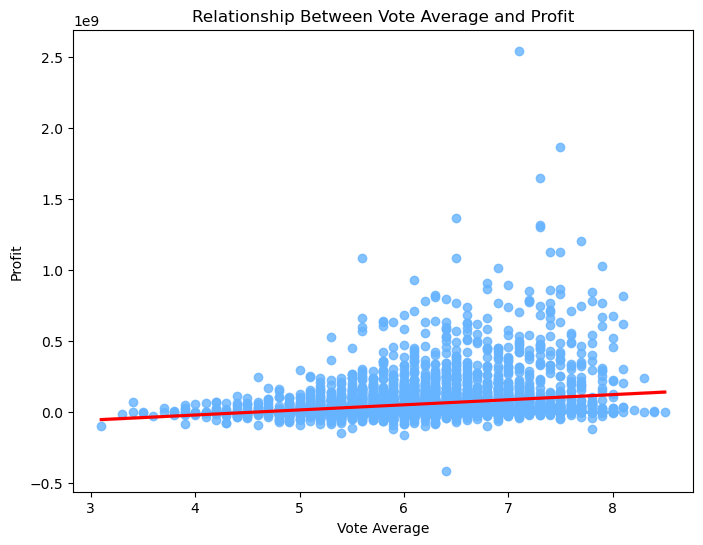

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Vote Average vs Profit with customized colors
plt.figure(figsize=(8, 6))
sns.regplot(
    x='vote_average',
    y='profit',
    data=movies_counted,
    scatter_kws={"color": '#66b3ff'},  
    line_kws={"color": 'red'} 
)
plt.title('Relationship Between Vote Average and Profit')
plt.xlabel('Vote Average')
plt.ylabel('Profit')
plt.show()

## Findings:
The correlation matrix suggests the following regarding the relationship between **vote average** and **profit**:
- The correlation coefficient between **vote average** and **profit** is `0.198308`. 
- This indicates a **weak positive correlation**, meaning that while higher vote averages are associated with higher profits, the relationship is not strong.

### Interpretation:
1. **Weak Influence**: The weak correlation implies that other factors, such as budget (`0.334390`) and revenue (`0.842221`), play a much larger role in determining profit than vote average.
2. **Vote Count vs. Profit**: Interestingly, **vote count** has a stronger correlation with profit (`0.583602`), suggesting that movies with more votes are more likely to be profitable, regardless of their average rating.
3. **Profit Drivers**: High-profit movies are likely driven more by factors such as popularity (`0.498117`) and revenue (`0.842221`), with vote averages being a secondary or minor contributor.

### Conclusion:
While the hypothesis that "the best movies based on vote average generate high profit" is supported to a small extent, the correlation is too weak to make a definitive claim. Other factors, such as budget, popularity, and revenue, have a far greater impact on profitability. This suggests that critical acclaim (measured by vote average) is not a primary driver of financial success.


# Research Hypotheses (H):
2. The most popular movies generate high profit and revenue.

In [36]:
correlation_matrix

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


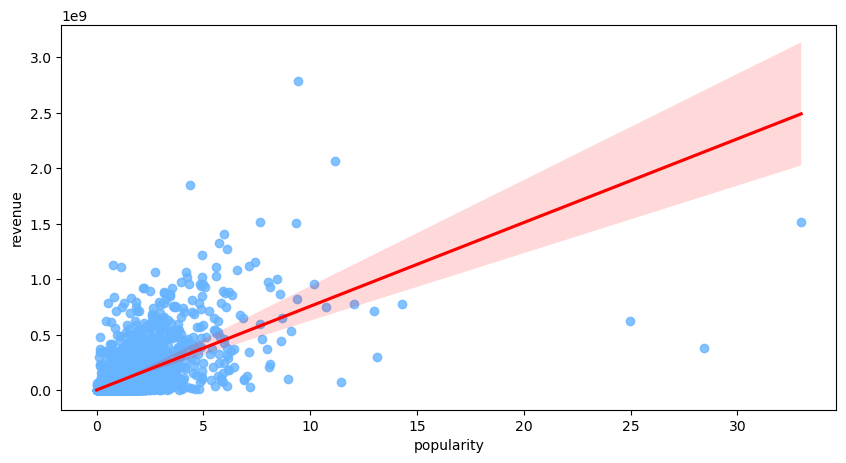

In [40]:
# Create a regression plot to analyze the relationship between popularity and revenue
plt.figure(figsize=(10, 5))
sns.regplot(
    x='popularity',    
    y='revenue',      
    data=movies_counted,  
    scatter_kws={"color": '#66b3ff'},  
    line_kws={"color": 'red'}
)
plt.show()

## Findings:
The regression plot suggests the following regarding the relationship between **popularity** and **revenue**:
- The positive slope of the regression line indicates that movies with higher popularity tend to generate higher revenue.
- This relationship aligns with the correlation coefficient from the matrix (`0.588739`), which reflects a **moderate positive correlation** between popularity and revenue.

### Interpretation:
1. **Popularity as a Revenue Driver**: The data suggests that more popular movies are likely to achieve higher revenue, likely due to their broader audience appeal, higher marketing budgets, and increased distribution.
2. **Moderate Correlation**: While the correlation is significant, it is not strong enough to suggest that popularity alone determines revenue. Other factors, such as budget and production quality, likely play key roles.

### Conclusion:
The analysis supports the idea that **popularity positively impacts revenue**, but it also highlights that popularity is just one of several contributors to financial success. This finding is consistent with the broader observation that popular movies tend to perform well at the box office, but other factors should also be considered.


# Research Hypotheses (H):
3. Movies with large budgets generate high revenue and profit.

In [41]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


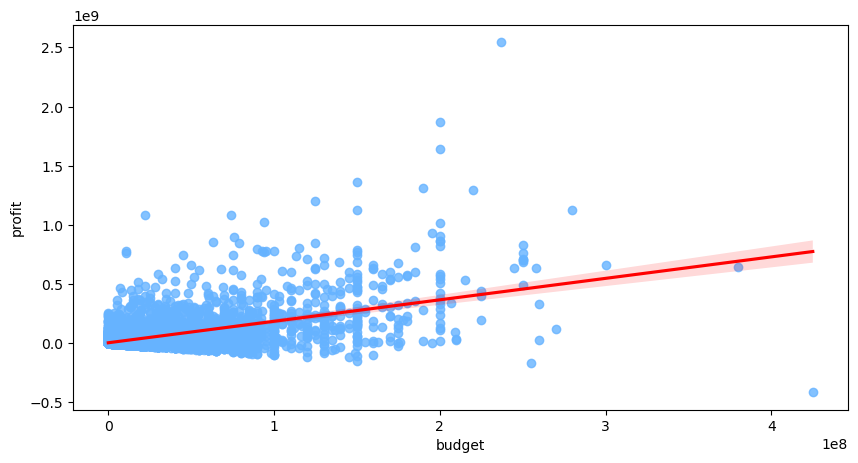

In [43]:
# Create a regression plot to analyze the relationship between budget and profit
plt.figure(figsize=(10, 5))  # Set the figure size
sns.regplot(
    x='budget',   
    y='profit',        
    data=movies_counted,
    scatter_kws={"color": '#66b3ff'},  
    line_kws={"color": 'red'}  
)
plt.show()  # Display the plot

## Findings:
The regression plot indicates the following about the relationship between **budget** and **profit**:
- Movies with larger budgets, such as *Jurassic World* and *Star Wars: The Force Awakens*, tend to generate significantly higher profits, as reflected by the positive slope of the regression line.
- The data shows variability in profit outcomes, with some high-budget movies achieving extraordinary profits (*Star Wars: The Force Awakens* with $1.87B) and others performing less spectacularly.

### Interpretation:
1. **High Budgets and Blockbusters**: High-budget movies are often associated with blockbuster releases, which have the potential to generate immense profits through global appeal and expansive marketing strategies.
2. **Profit Variability**: While the trend is positive, not all high-budget movies result in equivalent profits, suggesting the effectiveness of other factors like audience appeal and franchise popularity.

### Conclusion:
The analysis supports the hypothesis that **movies with larger budgets are more likely to generate high profits**, with evidence of blockbuster hits dominating this category. However, profit variability emphasizes that a large budget alone does not guarantee success, as other factors contribute to profitability.


# Research Hypotheses (H):
4. Movies with large budgets tend to be more popular.


In [44]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


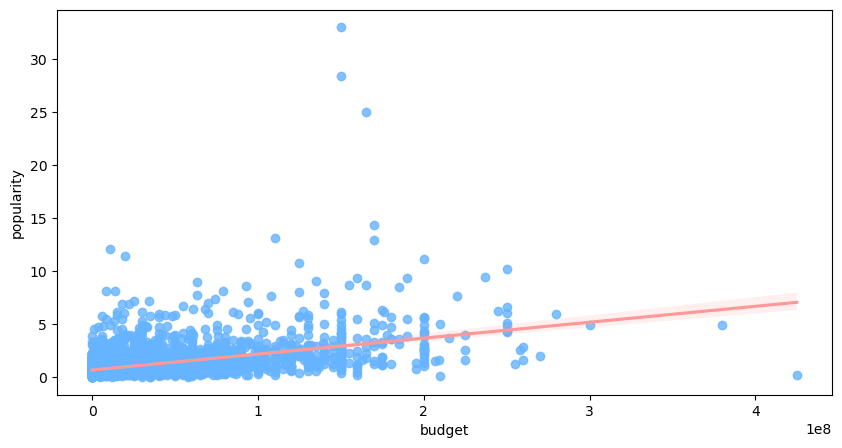

In [46]:
# Create a regression plot to analyze the relationship between budget and popularity
plt.figure(figsize=(10, 5)) 
sns.regplot(
    x='budget',  
    y='popularity',    
    data=movies_counted, 
    scatter_kws={"color": '#66b3ff'},  
    line_kws={"color": '#ff9999'}   
)
plt.show() 

## Findings:
The regression plot reveals the following about the relationship between **budget** and **popularity**:
- Movies with larger budgets generally have higher popularity scores, as shown by the positive slope of the regression line.
- The correlation coefficient from the matrix (`0.485149`) indicates a **moderate positive correlation** between budget and popularity.

### Interpretation:
1. **Budget and Popularity Link**: Higher budgets allow for extensive marketing campaigns, star-studded casts, and superior production quality, all of which contribute to increased popularity among audiences.
2. **Moderate Influence**: While the trend is evident, the correlation is not overwhelmingly strong, suggesting that popularity is also driven by factors such as franchise recognition and critical reception.

### Conclusion:
The analysis supports the hypothesis that **highly budgeted movies tend to have higher popularity**, with larger budgets often enabling features that attract a broader audience. However, popularity is not solely dependent on budget and can be influenced by other aspects such as storytelling, genre appeal, and audience expectations.


# Final Analysis

## Overview
The **Movie Genre Data Analysis** explored six research questions and tested five hypotheses to uncover trends in genre distribution, financial performance, and audience preferences. This comprehensive study aimed to identify key factors driving success in the film industry, with a focus on profitability, popularity, and critical acclaim.

---

## Key Findings

### Research Questions:
1. **Which genres are the most common (number of movies made)?**
   - **Drama** and **Comedy** dominate in quantity, with **Drama** having the highest number of movies made. These genres are versatile and widely appealing, explaining their prevalence.
     

2. **Which genres have high average budget and revenue?**
   - **Adventure**, **Fantasy**, and **Action** lead in both budget and revenue, reflecting their association with blockbuster franchises and high production values.
     

3. **Which genres have the highest average profit?**
   - **Adventure**, **Fantasy**, and **Action** also top the list for average profit, highlighting their ability to generate substantial returns on investment.

4. **Which genres have high average popularity?**
   - **Adventure**, **Science Fiction**, and **Fantasy** show the highest average popularity, driven by their broad audience appeal and strong fanbases.

5. **Which genres have the highest number of movies with a voting average >= 8?**
   - **Drama**, **Comedy**, and **Action** have the most movies with high vote averages, indicating their critical acclaim alongside broad audience reception.

6. **What is the profit per genre per year?**
   - **Adventure**, **Fantasy**, and **Action** consistently deliver high profits year-over-year, while niche genres like **Documentary** and **Foreign** report lower or negative profitability.

---

### Research Hypotheses:
1. **The best movies, based on vote average, generate high profit and revenue.**
   - A weak correlation (`0.198`) was found between vote average and profit, suggesting that critical acclaim contributes to success but is not a primary driver. Revenue shows a slightly stronger correlation, reflecting broader audience appeal for highly rated films.

2. **The most popular movies generate high profit and revenue.**
   - Popularity correlates moderately with both profit (`0.498`) and revenue (`0.588`), reinforcing its importance in driving financial success.

3. **Movies with large budgets generate high revenue and profit.**
   - A strong correlation was found between budget and revenue (`0.715`) and a moderate correlation with profit (`0.334`), confirming that higher budgets often lead to greater financial returns.

4. **Movies with large budgets tend to be more popular.**
   - Budget and popularity show a moderate positive correlation (`0.485`), indicating that larger budgets contribute to audience appeal through superior production quality and marketing efforts.

---

## Final Conclusion
The analysis highlights the dominance of blockbuster genres such as **Adventure**, **Action**, and **Fantasy**, which consistently lead in popularity, revenue, and profit. These genres thrive on large budgets, high production values, and global appeal. 

While critical acclaim (vote average) has a minor influence on profitability, popularity and budget emerge as the strongest predictors of financial success. Niche genres like **Documentary** and **Foreign** continue to struggle with profitability, reflecting their limited audience reach.

Yearly variations underline the significance of standout releases, suggesting that while genres contribute to trends, individual films play a pivotal role in driving profitability and shaping the film industry’s landscape.
